## 이항 분류
### 데이터를 그룹화 한 경우: country2.csv 사용의 경우
- 데이터의 크기에 따라 미분시 가중치와 편향이 변경되는 크기가 다름 
- 큰 규모의 데이터가 미분에 많은 변화의 영향을 발생시킨다.
- 큰 규모의 비율 척도를 작은 정수의 구간척도로 변경하여 처리 권장

In [1]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import os
import time

import numpy as np
import tensorflow as tf
import seaborn as sb

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 모델 저장

from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.metrics import confusion_matrix  # 혼돈행렬, 이항분류 시각화
from sklearn.metrics import roc_curve         # 분류 품질 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [3]:
data = np.loadtxt('./country2.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)  
print(data)

<class 'numpy.ndarray'>
(100, 7)
[[ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  1.  1. 10.  1.  0.  1.]
 [ 0.  0.  0. 10.  1.  0.  0.]
 [ 1.  0.  1. 10.  1.  2.  1.]
 [ 1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  1.  1. 10.  1.  3.  1.]
 [ 1.  0.  1.  2.  1.  1.  0.]
 [ 0.  1.  1. 10.  1.  3.  1.]
 [ 1.  0.  1. 10.  1.  3.  1.]
 [ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  1.  1. 10.  1.  1.  1.]
 [ 0.  0.  0. 10.  1.  1.  0.]
 [ 1.  0.  1. 10.  1.  3.  1.]
 [ 1.  1.  0. 10.  1.  3.  1.]
 [ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  1.  1. 10.  1.  1.  1.]
 [ 1.  0.  0.  3.  0.  1.  0.]
 [ 1.  1.  0. 10.  1.  3.  1.]
 [ 1.  1.  1. 10.  1.  2.  1.]
 [ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  0.  1. 10.  1.  3.  1.]
 [ 1.  1.  0.  7.  1.  0.  0.]
 [ 0.  0.  1. 10.  1.  1.  0.]
 [ 1.  1.  1. 10.  1.  3.  1.]
 [ 0.  0.  0.  5.  1.  0.  0.]
 [ 1. 

In [5]:
# 훈련용 + 검증용: 90 건
x_train = data[0:90, 0:6] # 변수 6개, 0 ~ 5
print(x_train.shape)
y_train = data[0:90, 6]   # class 1개
print(y_train.shape)
# 테스트용: 10 건
x_test =data[90:, 0:6]    # 변수 6개, 0 ~ 5
print(x_test.shape)
y_test =data[90:, 6]      # class 1개
print(y_test.shape)

(90, 6)
(90,)
(10, 6)
(10,)


In [6]:
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(20, input_dim=6, activation='relu')) # 기울기 소실 방지
model.add(Dense(15, activation='relu')) # 기울기 소실 방지
model.add(Dense(1, activation='sigmoid')) # True/False
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

# patience=2: 학습 결과가 개선되지 않아도 학습을 진행할 횟수
# restore_best_weights=True: 학습 종료시 가장 우수한 가중치, 편향으로 저장
es= EarlyStopping(monitor='loss', patience=1, restore_best_weights=True)

# 검증 정확도가 개선되었을 때만 학습 모델 파일로 저장
# filepath=modelpath: 파일이 저장되는 경로와 파일명
# monitor='val_accuracy': 검증 정확도 기준으로 판단
# verbose=1: 기록되는 파일 정보 출력
# save_best_only=True: 검증 정확도가 개선되면 파일로 저장
mcp= ModelCheckpoint(filepath='./Country2.h5',
                    monitor='val_accuracy',
                    verbose=1, save_best_only=True)

start = time.time()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=1000, batch_size=1, callbacks=[es, mcp])
end=time.time()
print('Runtime: {0:.0f} 초'.format(end-start))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 1s 6ms/step - loss: 1.3097 - accuracy: 0.4567 - val_loss: 0.6401 - val_accuracy: 0.8889

Epoch 00001: val_accuracy improved from -inf to 0.88889, saving model to .\Country2.h5
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.8128 - val_loss: 0.5104 - val_accuracy: 0.6111

Epoch 00002: va

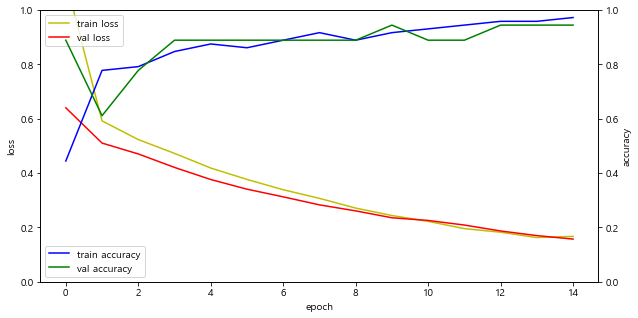

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

In [8]:
# verbose=0: 처리과정의 메시지 생략
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.3149970471858978 /정확도: 80.0000011920929 %


In [7]:
model = load_model('Country2.h5')

In [35]:
# 1) 주당 음주 횟수: 0 ~ 3(3회 이상)
# 2) 농촌에서 생활적이 있다: 0(없음), 1(있음)
# 3) 가족중에 농촌에서 생활하고 있는 친척있는 여부: 0(없음), 1(있음)
# 4) 1년동안의 여행 횟수: 0 ~ 12
#     (12이상, 교통을 이용한 등산/캠핑, 당일, 국내, 국외 모두 해당)
# 5) 집을 소유 할 수 있는 경제력: 0(없음), 1(있음)
# 6) 경작 할 수 있는 토지 평수: 0 ~ (평)
#     0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상
# 7) 정착: 1, 실패: 0
        
drink = int(input('주당 음주 횟수는 (0 ~ 3(3회 이상)):'))
life = int(input('농촌에서 생활한 경험(0(없음), 1(있음)):'))
life2 = int(input('가족중에 농촌에서 생활하고 있는 친척있는 여부(0(없음), 1(있음)):'))
trip = int(input('1년동안의 여행 횟수(0 ~ 12):'))
house = int(input('집을 소유 할 수 있는 경제력(0(없음), 1(있음)):'))
land = int(input('경작 할 수 있는 토지 평수(0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상):'))

In [36]:
data = []
data.append(drink)
data.append(life)
data.append(life2)
data.append(trip)
data.append(house)
data.append(land)

x = np.array([
             data,
      ])
print(x.shape)
print(x)

(1, 6)
[[0 1 1 1 0 0]]


In [37]:
yp = model.predict(x)
print(yp)
print(yp.shape)

for i in range(len(x)):
    # print('적응 확률:', yp[i][0] * 100, ' %')
    print('적응 확률: {0:.3f}%'.format(yp[i][0] * 100))
    
    if yp[i][0] >= 0.5:    # 기존 사례를 참고하여 결정
        print('시골형: 시골에 적응 할 수 있습니다.')
    else:
        print('도시형: 시골에 적응이 불가능합니다.')

[[0.39978376]]
(1, 1)
적응 확률: 39.978%
도시형: 시골에 적응이 불가능합니다.
